# Chapter 2. End-to-End Machine Learning Project Real Estate Project


1. Framing the problem & looking at the big picture

2. Get the data

3. Explore the Data

4. Data Preparation
    
5. Shortlist promising models

6. Fine-tune your models & combine them into a great solution

7. Present the solution

8. Launch, Monitor, and maintain your system


## 2. Get the Data

### Download the Data



In [1]:
import os
import tarfile
import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("data", "01")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """Creates `HOUSING_PATH`, Downloads & Extracts the contents of `HOUSING_URL` into `HOUSING_PATH`
    
    # Arguments:
        housing_url, string: the download link
        housing_path, string: where to download & extract data
    """
    os.makedirs(name=housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(url=housing_url, filename=tgz_path)
    housing_tgz = tarfile.open(name=tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

In [6]:
def load_housing_data(housing_path=HOUSING_PATH):
    """Loads Housing data into a pandas dataframe.
    
    # Arguments:
        housing_path: the path where `housing.csv` exists
    
    # Returns:
        data, pd.DataFrame: the housing data as a pandas dataframe
    """
    data_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(data_path)

### Take a Quick Look at the Data Structure

In [7]:
housing = load_housing_data()

In [8]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Each row represents one district and has the following (10) attributes:
- `longitude`
- `latitude`
- `housing_median_age`
- `total_rooms`
- `total_bedrooms`
- `population`
- `households`
- `median_income`
- `median_house_value`
- `ocean_proximity`


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing['ocean_proximity'].value_counts()

`.describe()` shows a summary of all numerical values:

In [11]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

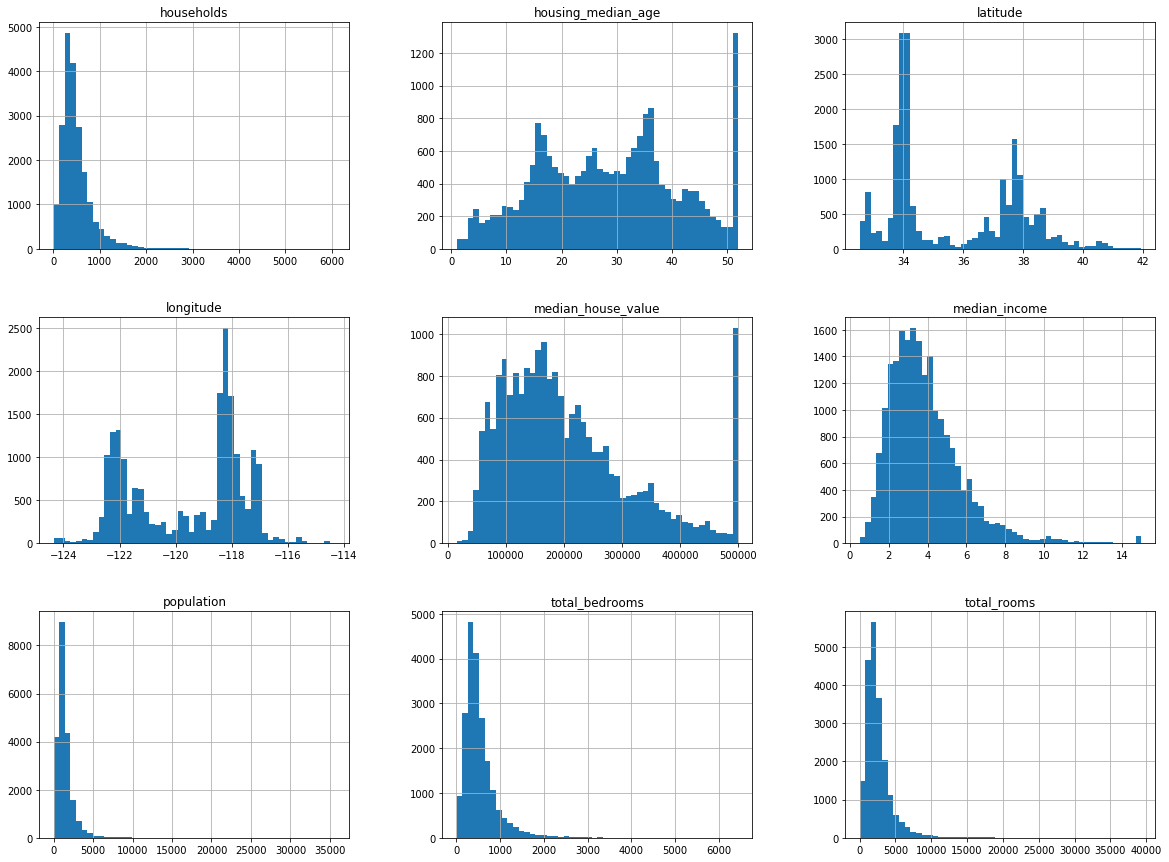

In [13]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Create a Test Set



In [14]:
import numpy as np

In [15]:
def split_train_test(data, test_ratio=0.2):
    """Splits a dataset into train/test using a `test_ratio`.
    
    # Arguments
        data, pd.DataFrame: the whole dataset.
        test_ratio, float: the percentage taken from the original dataset as a test set.
    
    # Returns
        train, pd.DataFrame: the training set.
        test, pd.DataFrame: the test set.
    """
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
# you can then use the function like this
train_set, test_set = split_train_test(data=housing)
len(train_set), len(test_set)

(16512, 4128)

In [17]:
from zlib import crc32

In [18]:
def test_set_check(identifier, test_ratio=.2):
    """Checks if an instance with `identifier` should be in the test set of overall ratio `test_ratio`
    
    # Arguments:
        identifier, int: the instance/row identifier (ex. row index from `pd.DataFrame`)
        test_ratio, float \in [0,1]: percentage of test set taken from overall data set.
    
    # Returns:
        in_test, bool: True if instance should be in the test set, False otherwise.
    
    # Notes:
        - The CRC32 function converts a varibale-length string into an 8-character string that 
        is a text representation of the hexadecimal value of a 32bit binary sequence.
    """
    total_size = 2**32
    hex_repr = crc32(np.int64(identifier)) & 0xffffffff
    in_test = hex_repr < (test_ratio * total_size)
    return in_test

In [19]:
[test_set_check(i) for i in range(10)]

[False, False, True, False, False, True, False, False, False, False]

In [20]:
def split_train_test_by_id(data, test_ratio, id_column):
    """Splits a dataframe using hash-based identification
    
    # Arguments:
        data, pd.DataFrame: the dataframe comprised of an id column and data of interest.
        test_ratio, float \in [0,1]: percentage of test set taken from overall data set.
        id_column, string: column name with identifiers for each row.
    
    # Returns:
        train, pd.DataFrame: the train set.
        test, pd.DataFrame: the test set.
    """
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [21]:
housing_with_id = housing.reset_index()

In [22]:
train_set, test_set = split_train_test_by_id(data=housing_with_id, test_ratio=0.2, id_column="index")
train_set.shape, test_set.shape

((16512, 11), (4128, 11))


1. Convert latitude/longitude values from $\Bbb{R}$ to $\Bbb{Z}$ (by $\times 100$)
2. Convert latitude/longitude from $\Bbb{Z}$ to $\Bbb{N}$ using:

$$
f(n) =
\begin{cases}
2n,  & \text{if $n \ge 0$} \\
-2n-1, & \text{if $n \lt 0$}
\end{cases}
$$

3. Use `Cantor Pairing` function to create unique indexes from $\Bbb{N}^2$ tuples using:
$$\pi(k_{1},k_{2})={(k_{1}+k_{2})\cdot{(k_{1}+k_{2}+1)}\over{2}}+k_{2}$$



In [23]:
def from_Z_to_N(z):
    """Converts a number from \Bbb{Z} to \Bbb{N}
    
    # Arguments
        z, integer: in \Bbb{Z}
    
    # Returns
        n, natural number: in \Bbb{N}
    """
    if z >= 0:
        n = 2 * z
    else:
        n = -2 * z - 1
    return n

In [24]:
def cantor_pairing(n1, n2):
    """Creates a unique number `n` in \Bbb{N} from a tuple (n1,n2) in \Bbb{N}^2
    
    # Arguments
        n1, natural number: first element of the tuple.
        n2, natural number: second element of the tuple.
    
    # Returns
        n, natural number: unique index from tuple (n1,n2).
    """
    n = ( ( (n1 + n2) * (n1 + n2 + 1) ) / 2 ) + n2
    return n

In [25]:
def lat_lon_to_index(lat, lon):
    """Converts a tuple of (lat,lon) to a unique index in \Bbb{N}
    
    # Arguments
        lat, float: latitude.
        lon, float: longitude.
    
    # Returns
        index, positive int: unique index.
    
    # Notes
        - 3 steps to do it:
            1. Convert (lat,lon) to \Bbb{Z} by *100.
            2. Convert (lat,lon) from \Bbb{Z} to \Bbb{N} using `from_Z_to_N()`
            3. Create the unique index using `cantor_pairing(_,_)`
    """
    lat, lon = int(lat*100), int(lon*100)
    lat, lon = from_Z_to_N(lat), from_Z_to_N(lon)
    index = cantor_pairing(lat, lon)
    return np.int64(index)

In [26]:
housing['id'] = housing.apply(lambda row: lat_lon_to_index(row['latitude'], row['longitude']), axis=1)

In [27]:
housing['id'].value_counts()

513289261    24
513481522    20
513417431    18
513353344    18
463548767    14
             ..
467821317     1
466232077     1
459780879     1
463061777     1
525471590     1
Name: id, Length: 11573, dtype: int64

In [28]:
housing.groupby(by=['longitude', 'latitude']).count()['total_rooms'].sort_values()

longitude  latitude
-124.35    40.54        1
-118.90    34.41        1
           35.26        1
           35.41        1
-118.89    34.22        1
                       ..
-122.41    37.75       10
-122.42    37.75       10
-122.44    37.78       11
-122.42    37.80       11
-122.41    37.80       15
Name: total_rooms, Length: 12590, dtype: int64

In [29]:
del(housing['id'])

In [30]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]

In [31]:
train_set, test_set = split_train_test_by_id(data=housing_with_id, test_ratio=0.2, id_column='id')
train_set.shape, test_set.shape

((16322, 12), (4318, 12))

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

 **Stratified sampling**.



In [ ]:
housing['income_cat'] = pd.cut(x=housing['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])

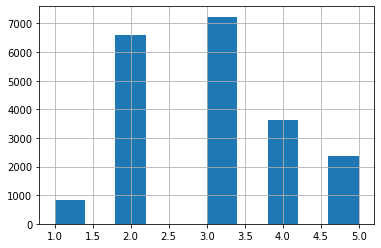

In [35]:
# visualize the categories
housing['income_cat'].hist()

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit

In [37]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [38]:
for train_index, test_index in split.split(X=housing, y=housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [39]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [40]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

## 3.Discover & Visualize the Data to Gain Insights



In [41]:
strat_train_set.shape, strat_test_set.shape

((16512, 10), (4128, 10))

In [42]:
strat_test_set.reset_index().to_feather(fname='data/01/strat_test_set.f')

In [43]:
housing = strat_train_set.copy(); housing.shape

(16512, 10)

### Visualizing Geographical Data



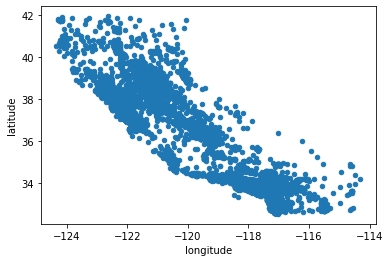

In [44]:
housing.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

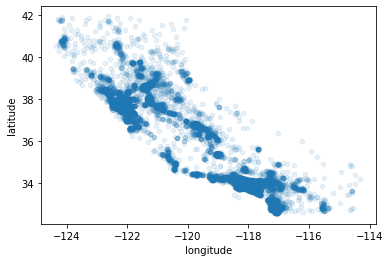

In [45]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.show()

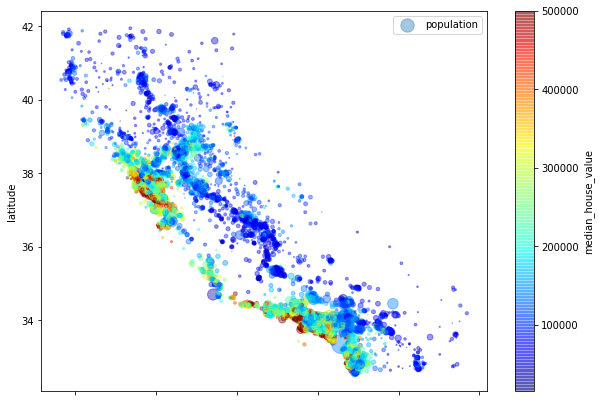

In [46]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=.4, s=housing['population']/100., 
             label='population', figsize=(10, 7), c='median_house_value', cmap=plt.get_cmap(name='jet'), colorbar=True)
plt.legend()

In [47]:
housing[['population', 'median_house_value']].corr()

population  median_house_value
population             1.00000            -0.02692
median_house_value    -0.02692             1.00000

### Looking for Correlations



In [48]:
corr_matrix = housing.corr()

In [49]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [50]:
from pandas.plotting import scatter_matrix

In [51]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

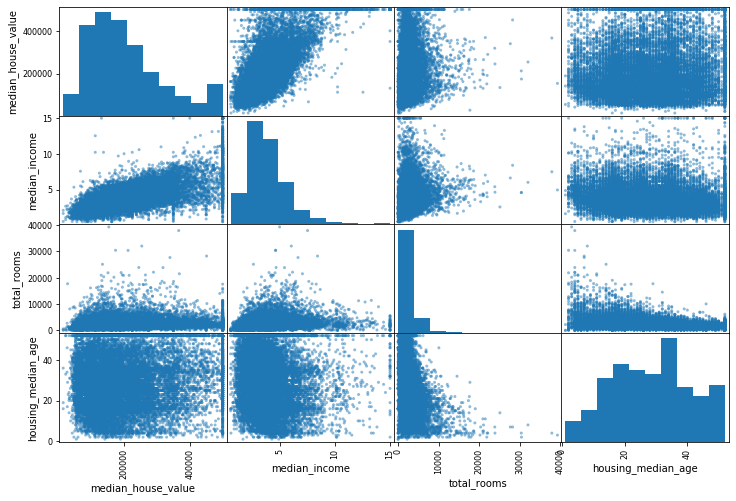

In [52]:
scatter_matrix(frame=housing[attributes], figsize=(12, 8))
plt.show()

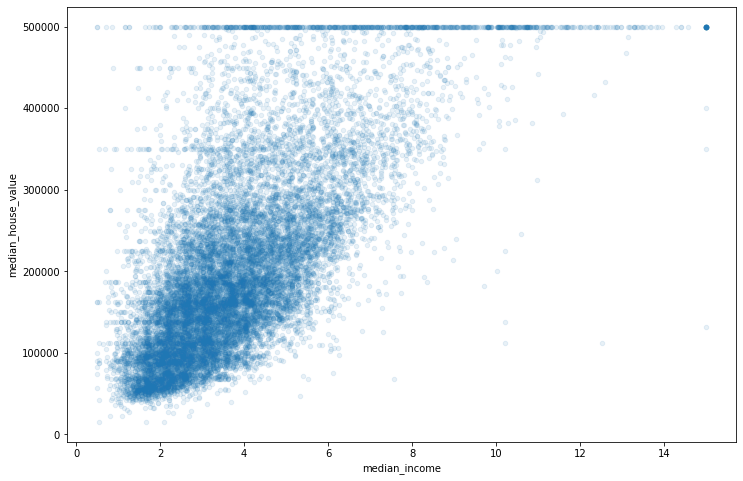

In [53]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', figsize=(12,8), alpha=0.1)
plt.show()

### Experimenting with Attribute Combinations



In [54]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

 Correlation matrix

In [55]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## 4. Prepare the Data for Machine Learning Algorithms


In [56]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing.shape, housing_labels.shape

((16512, 9), (16512,))

### Data Cleaning


We saw earlier that `total_bedrooms` have missing values, we have 3 options:
1. Get rid of the corresponding districts
    - `housing.dropna(subset='total_bedrooms')`
2. Get rid of the whole attribute (feature)
    - `housing.drop('total_bedrooms', axis=1)`
3. Set the missing values to some value (zero, mean, median, regressor preds,...)
    - `median = housing['total_bedrooms'].median()`
    - `housing['total_bedrooms'].fillna(median, inplace=True)`
    
We can also use `scikit-learn`'s `SimpleImputer`:

In [57]:
from sklearn.impute import SimpleImputer

In [58]:
imputer = SimpleImputer(strategy='median')

In [59]:
housing_num = housing.drop("ocean_proximity", axis=1)

Now we can just fit the imputer to the dataframe:

In [60]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [61]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [62]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [63]:
X = imputer.transform(housing_num)
X.shape

(16512, 8)

In [64]:
housing_tr = pd.DataFrame(data=X, index=housing_num.index, columns=housing_num.columns)
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  
17606       710.0       339.0         2.7042  
18632       306.0       113.0         6.4214  
14650       936.0       462.0         2.8621  
3230       1460.0       353.0         1.8839  
3555       4459.0      1463.0         3.0347

### Handling Text & Categorical Attributes



In [65]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
19480          INLAND
8879        <1H OCEAN
13685          INLAND
4937        <1H OCEAN
4861        <1H OCEAN

In [66]:
housing_cat['ocean_proximity'].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [67]:
from sklearn.preprocessing import OrdinalEncoder

In [68]:
ordinal_encoder = OrdinalEncoder()

In [69]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat.values)
housing_cat_encoded.shape

(16512, 1)

In [70]:
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [71]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]



The new attributes are sometimes called dummy attributes

In [72]:
from sklearn.preprocessing import OneHotEncoder

In [73]:
one_hot_encoder = OneHotEncoder()

In [74]:
housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat.values)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [75]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [76]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformers


In [77]:
from sklearn.base import TransformerMixin, BaseEstimator

In [78]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [79]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    """Engineers new features from existing ones: `rooms_per_household`, `population_per_household`, `bedrooms_per_room`
    
    # Arguments:
        add_bedrooms_per_room, bool: defaults to True. Indicates if we want to add the feature `bedrooms_per_room`.
    """
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self  # We don't have any internal parameters. Only interested in transforming data.
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [80]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

In [81]:
housing_extra_attribs = attr_adder.transform(housing.values)

### Feature Scaling

With few exceptions, ML algorithms don't perform well on data features that have different scales. However, scaling the target value is generally not required.

There are two ways to get all features to have the same scale:
- `Min-Max` 
- `Standarization`



### Transformation Pipelines



In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [83]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [84]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr.shape

(16512, 11)

In [85]:
from sklearn.compose import ColumnTransformer

In [86]:
num_attribs = housing_num.columns.tolist()
cat_attribs = ["ocean_proximity"]

In [87]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

In [88]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 16)

## 5. Select & Train a Model



### Training & Evaluating on the Training Set





In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lin_reg = LinearRegression()

In [91]:
lin_reg.fit(X=housing_prepared, y=housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 Training set:

In [92]:
some_data = housing.iloc[:5]

In [93]:
some_labels = housing_labels.iloc[:5]

In [94]:
some_data_prepared = full_pipeline.transform(some_data)

In [95]:
print("Predictions: ", lin_reg.predict(some_data_prepared))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [96]:
print("Labels: ", some_labels.tolist())

Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [97]:
from sklearn.metrics import mean_squared_error

In [98]:
housing_predictions = lin_reg.predict(housing_prepared)

In [99]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [100]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923


 `DecisionTreeRegressor`, this is a powerful model, capable of finding non-linear relationships within the data:

In [101]:
from sklearn.tree import DecisionTreeRegressor

In [102]:
tree_reg = DecisionTreeRegressor()

In [103]:
tree_reg.fit(X=housing_prepared, y=housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [104]:
housing_predictions = tree_reg.predict(housing_prepared)

In [105]:
tree_mse = mean_squared_error(y_true=housing_labels, y_pred=housing_predictions)

In [106]:
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [107]:
from sklearn.model_selection import cross_val_score

In [108]:
scores = cross_val_score(estimator=tree_reg, X=housing_prepared, 
                         y=housing_labels, scoring='neg_mean_squared_error', cv=10)

In [109]:
tree_rmse_scores = np.sqrt(-scores)

In [110]:
def display_scores(scores):
    """Displays the scores, their mean, and the standard deviation.
    
    # Arguments:
        scores, np.array: list of scores given by the cross validation procedure.
    """
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [111]:
display_scores(tree_rmse_scores)

Scores: [70295.85879837 67208.2294927  71916.75200996 68928.55067415
 71046.20989839 73194.27731825 69429.16053652 71235.46411182
 75889.22508973 70339.47885913]
Mean: 70948.3206789036
Standard Deviation: 2272.8560419542605


 Linear regression model



In [ ]:
scores = cross_val_score(estimator=lin_reg, X=housing_prepared, 
                         y=housing_labels, scoring='neg_mean_squared_error', cv=10)

In [ ]:
lin_rmse_scores = np.sqrt(-scores)

In [114]:
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard Deviation: 2731.6740017983493



 **Ensemble Learning**.

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
forest_reg = RandomForestRegressor()

In [117]:
forest_reg.fit(X=housing_prepared, y=housing_labels)

//miniconda3/envs/research/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [118]:
forest_mse = mean_squared_error(y_true=housing_labels, y_pred=forest_reg.predict(X=housing_prepared))

In [119]:
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22029.216324549794

In [120]:
scores = cross_val_score(estimator=forest_reg, X=housing_prepared, 
                         y=housing_labels, scoring='neg_mean_squared_error', cv=10)

In [121]:
forest_rmse_scores = np.sqrt(-scores)

In [122]:
display_scores(scores=forest_rmse_scores)

Scores: [52402.35340164 49150.98777662 51917.13835708 55214.67790364
 51984.68506744 57732.63314668 51068.95231905 50490.24426029
 55393.77710271 52942.68273899]
Mean: 52829.813207413725
Standard Deviation: 2452.545263218794


In [123]:
import joblib

In [124]:
joblib.dump(value=forest_reg, filename='models/01/forest_reg.m')

['models/01/forest_reg.m']

In [125]:
# & later
forest_reg = joblib.load(filename='models/01/forest_reg.m')

## 6. Fine-Tune Your Model



### Grid Search




In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [130]:
forest_reg = RandomForestRegressor()

In [131]:
grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1)

In [132]:
grid_search.fit(X=housing_prepared, y=housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
  



The model will first explore $3 \times 4$ combinations of hyper-parameters, then jump to the 2nd hyper-parameter space and try $1 \times 2 \times 3$. For each combination, it will train 5 times using the cross validation strategy, all in all: It will train **90** different model variations.

In [133]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [134]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [135]:
cvres = grid_search.cv_results_

In [136]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63751.20022020855 {'max_features': 2, 'n_estimators': 3}
55370.922775715415 {'max_features': 2, 'n_estimators': 10}
52904.227253068806 {'max_features': 2, 'n_estimators': 30}
60731.88068265941 {'max_features': 4, 'n_estimators': 3}
53108.94765264947 {'max_features': 4, 'n_estimators': 10}
50435.77072997419 {'max_features': 4, 'n_estimators': 30}
58821.23720793129 {'max_features': 6, 'n_estimators': 3}
52418.38775416207 {'max_features': 6, 'n_estimators': 10}
49815.96410841989 {'max_features': 6, 'n_estimators': 30}
59453.91629016195 {'max_features': 8, 'n_estimators': 3}
51895.55638084359 {'max_features': 8, 'n_estimators': 10}
49807.061426784 {'max_features': 8, 'n_estimators': 30}
62083.74010960627 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54300.69562195466 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60568.5849318819 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52238.21182418438 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

### Randomized Search



### Ensemble Methods

.

### Analyze the best models & their errors



In [137]:
feature_importances = grid_search.best_estimator_.feature_importances_
(feature_importances*100).astype(int)

array([ 6,  6,  4,  1,  1,  1,  1, 32,  6, 11,  6,  0, 18,  0,  0,  0])

In [138]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

In [139]:
cat_encoder = full_pipeline.named_transformers_['cat']

In [140]:
cat_one_hot_attributes = cat_encoder.categories_[0].tolist()

In [141]:
attributes = num_attribs + extra_attribs + cat_one_hot_attributes

In [142]:
# sorted(zip(feature_importances, attributes), reverse=True)
dict(zip(feature_importances, attributes))

{0.06614195992562232: 'longitude',
 0.06344029958610363: 'latitude',
 0.04469855412347374: 'housing_median_age',
 0.015494148837422152: 'total_rooms',
 0.014381096417454978: 'total_bedrooms',
 0.015314670216386326: 'population',
 0.014510586727973786: 'households',
 0.3256163085267954: 'median_income',
 0.06813486800603749: 'rooms_per_hhold',
 0.11376029387676202: 'pop_per_hhold',
 0.06515241883166968: 'bedrooms_per_room',
 0.002568336193539316: '<1H OCEAN',
 0.18594650472353433: 'INLAND',
 0.00010550288726181512: 'ISLAND',
 0.0017313638948778165: 'NEAR BAY',
 0.003003087225085202: 'NEAR OCEAN'}

### Evaluate your system on the test set



In [143]:
final_model = grid_search.best_estimator_

In [144]:
X_test = strat_test_set.drop(labels='median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [145]:
X_test_prepared = full_pipeline.transform(X=X_test)

In [146]:
final_predictions = final_model.predict(X=X_test_prepared)

In [147]:
final_mse = mean_squared_error(y_true=y_test, y_pred=final_predictions)

In [148]:
final_rmse = np.sqrt(final_mse)
final_rmse

48739.038026174676

In [149]:
from scipy import stats

In [150]:
confidence = .95

In [151]:
squared_errors = (y_test - final_predictions) ** 2

In [152]:
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([46681.93025447, 50712.77002048])

## 7. Launch, Monitor, & Maintain your system

Perfect, we got approval to launch. Now you need to get your solution ready for production (document code, write tests, ...). 

Then we can deploy your model to a production environment. One way to do this is to save the whole pre-processing pipeline, the predictor (using joblib) then load it into the production environment and use `.predict()` to output new predictions. We want to load the model upon server startup, rather than everytime it is used:

<div style="text-align:center;"><img style="width:50%;" src="static/imgs/micro-services.png"></div>

We can hot-load the model within a web application, or alternatively, wrap the model around its own API end-point and design the web component separately. This will allow us to upgrade the model to new versions without interrupting the web server. The Second option also allows scalability around the micro-services architecture, another advantage is that we don't have to write the web app using Python.

However, deploying is not the end of the story. We also need to write monitoring code to track the performance of the model within the live environment and send alerts when the performance drops. This can be caused by either bad system architecture or model rotting since trends do change over time.

Sometimes, model performance can be inferred from downstream tasks. Like having a recommender system proposing products and then tracking sold recommended products to non-recommended products sold.

Sometimes, It's not possible to determine the model's performance without human intervension. For example, a model that is supposed to detect errors in a production line for products. In that case, we would need to send a random sample of products that passed through and the model wasn't so sure about to be checked by a human expert.

All of this can be a lot of work, and most of the times It'll be more work than training and building the whole model. If the data keeps evolving, we would need to re-train the model regularly.

What we must do is automate the process as much as possible by doing the following:
- Collecting fresh data regularly and labeling it.
- Writing a script to train the model and fine-tune the hyper-parameters regularly.
- Writing a script that evaluates the new model's vs previous model's performance on the new test set and deploy if the performance increased.

We should also make sure to evaluate the model's input data quality by trigger an alert if:
- More and more inputs are missing a feature.
- The data's mean/std drifts too far from the training set ones.
- A categorical feature starts containing new categories.
        
Finally, we must have a way to archive model history (save all exported models) and automate a way to roll back to previous ones. Also, keeping backups of every dataset we produce so we can roll back to any one and test combinations of dataset and model versions. 

We also would want to save different test sets that target different data properties (ex. a test set containing only recent data or a test set containing one category from a feature). This will help us analyze the strengths and weaknesses of the model.

Much of the work is in the data preparation step. Building monitoring tools, setting up pre-processing pipelines, and having human evaluators.

It's preferrable to be familiar with the overall process and know 2 or 3 ML algorithms very well than to invest our time in advanced algorithms without practical knowledge.

## Exercices

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [154]:
param_grid = [
    {
        'kernel': ['linear'], 
        'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]
    },
    {
        'kernel': ['rbf'], 
        'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
        'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]
    }
]

In [155]:
svm_reg = SVR()

In [156]:
grid_search = GridSearchCV(estimator=svm_reg, param_grid=param_grid, cv=5, scoring="neg_mean_squared_error", verbose=2, n_jobs=-1)

In [157]:
grid_search.fit(X=housing_prepared, y=housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 16.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

In [158]:
best_mse = grid_search.best_score_
best_rmse = np.sqrt(-best_mse)
best_rmse

70363.90313964167

In [159]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

**2. Try replacing `GridSearchCV` with `RandomizedSearchCV`**

In [160]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, expon

In [161]:
params_distribs = {
    'kernel': ['linear', 'rbf'],
    'C': reciprocal(20, 200000),
    'gamma': expon(scale=1)
}

In [162]:
svm_reg = SVR()

In [163]:
random_search = RandomizedSearchCV(estimator=svm_reg, param_distributions=params_distribs, 
                                   scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=2)

In [164]:
random_search.fit(X=housing_prepared, y=housing_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.2min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a274e60d0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1d94fbd0>,
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

In [165]:
best_mse = random_search.best_score_
best_rmse = np.sqrt(-best_mse)
best_rmse

60051.456669637686

In [166]:
random_search.best_params_

{'C': 63786.48609569545, 'gamma': 0.8914099487077451, 'kernel': 'rbf'}

**3. Try adding a transformer to the pipeline to select only the most important attributes**

In [167]:
from sklearn.base import BaseEstimator, TransformerMixin

In [169]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

In [170]:
arr = [-15, 30, 5, 89, -34, 15, 88]
indices_of_top_k(arr, 3)

array([1, 3, 6])

In [171]:
class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(arr=self.feature_importances, k=self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [172]:
k = 5

In [182]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [185]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(X=housing)
housing_prepared_top_k_features[:3, :3]

array([[-1.15604281, -0.61493744, -0.31205452],
       [-1.17602483,  1.33645936,  0.21768338],
       [ 1.18684903, -0.5320456 , -0.46531516]])

**4. Try creating a single pipeline that does full data preparation + prediction**



In [193]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('prediction', SVR(**random_search.best_params_))
])

In [194]:
prepare_select_and_predict_pipeline.fit(X=housing, y=housing_labels)

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                              

In [196]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

In [198]:
print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Targets:\t", some_labels.tolist())

Predictions:	 [183198.80606101 333025.53597133 171102.79065145  53697.40747689]
Targets:	 [286600.0, 340600.0, 196900.0, 46300.0]


**5. Automatically Explore some preparation options using `GridSearchCV`**

In [199]:
param_grid = [
    {
        'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
        'feature_selection__k': list(range(1, len(feature_importances) + 1))
    }
]

In [202]:
grid_search_prep = GridSearchCV(estimator=prepare_select_and_predict_pipeline, param_grid=param_grid, 
                                cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

In [203]:
grid_search_prep.fit(X=housing, y=housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 28.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preparation',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                     

In [204]:
grid_search_prep.best_params_

{'feature_selection__k': 8, 'preparation__num__imputer__strategy': 'mean'}

In [205]:
grid_search_prep.best_score_

-3314361096.081166

---